In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from alp.models import ALP
from alp import const, models, exp
from alp import plot_tools as pt
from alp.exp_dicts import EXPERIMENTS

In [32]:
alp = models.ALP(0.1, 1e7)

ncase = 'nlow'
bcase = 'blow'
CHARM_df_ll = exp.Experiment(f"tau_events/df_120GeV_1e6_{ncase}_{bcase}.parquet", exp_dic=EXPERIMENTS['MicroBooNE'], alp=alp, savemem=False)

ncase = 'nhigh'
bcase = 'bhigh'
CHARM_df_hh = exp.Experiment(f"tau_events/df_120GeV_1e6_{ncase}_{bcase}.parquet", exp_dic=EXPERIMENTS['MicroBooNE'], alp=alp, savemem=False)

(1e-08, 0.2)

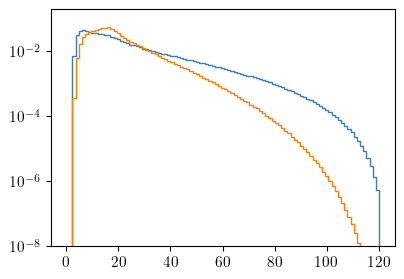

In [33]:
bins = np.linspace(1e-2, 120, 100)
_=plt.hist(CHARM_df_ll.df_taus['E_mother'], bins=bins, weights=CHARM_df_ll.tau_weights, histtype='step', label='low n, low b', density=True)
_=plt.hist(CHARM_df_hh.df_taus['E_mother'], bins=bins, weights=CHARM_df_hh.tau_weights, histtype='step', label='high n, high b', density=True)
# plt.loglog()
plt.semilogy()
plt.ylim(1e-8, 2e-1)

[]

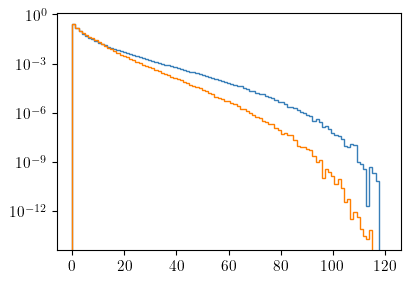

In [ ]:
bins = np.linspace(1e-2, 120, 100)
_=plt.hist(CHARM_df_ll.df_daughter2['E_mother'], bins=bins, weights=CHARM_df_ll.tau_weights, histtype='step', label='low n, low b', density=True)
_=plt.hist(CHARM_df_hh.df_daughter2['E_mother'], bins=bins, weights=CHARM_df_hh.tau_weights, histtype='step', label='high n, high b', density=True)
# plt.loglog()
plt.semilogy()
# plt.ylim(1e-8, 2e-1)

In [7]:
BR_D_to_tau = 0.056 # Ds -> tau branching ratio
frag_frac = 0.08 # Fragmentation fraction
xsec_tot = 38 # mbar -- total pp x section

xsec_ccbar_low = 2.8e-3 # mbar -- ccbar prod x section
xsec_ccbar_central = 4.6e-3 # mbar -- ccbar prod x section
xsec_ccbar_high = 6.4e-3 # mbar -- ccbar prod x section

low_normalization = BR_D_to_tau * frag_frac * xsec_ccbar_low / xsec_tot
central_normalization = BR_D_to_tau * frag_frac * xsec_ccbar_central / xsec_tot
high_normalization = BR_D_to_tau * frag_frac * xsec_ccbar_high / xsec_tot

In [ ]:
np.max(n[.([y_hh, y_ll, y_hb, y_lb, y_pythia]), axis=0)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

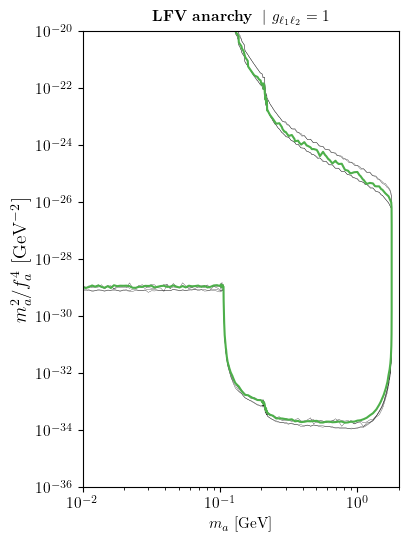

In [ ]:
from alp.plot_tools import *

fig, ax = std_fig(figsize=(4, 6))
name = 'anarchy'
lamb = 1
c_lepton = np.array([[1, lamb, lamb], 
                     [lamb, 1, lamb],
                     [lamb, lamb, 1]
                     ])

# plot_other_limits(ax, c_lepton=c_lepton, c_NN=0, mN=0, linewidth=0.5, annotate=False)

# labels for legend
labels = []
labelnames = []
fa_power=4
ma_power=2

Nsig = 2.3
y_funcs = []
for exp_name in ['NOVA']:
    for ncase in ['nlow', 'nhigh']:
        for bcase in ['blow', 'bhigh']:
            label = f'{ncase} {bcase}'

            X, Y, Z = np.load(f"data/{exp_name}_{ncase}_{bcase}_rates_anarchy_vMC.npy", allow_pickle=True)
            c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors='None')
            x_hh, y_hh = c.get_paths()[0].vertices.T
            plt.plot(x_hh, y_hh*x_hh**ma_power, label=rf'{exp_name} {label}', lw=0.2, color='black')

    X, Y, Z = np.load(f"data/{exp_name}_pythia8_rates_anarchy_vMC.npy", allow_pickle=True)
    c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors='None')
    x_pythia, y_pythia = c.get_paths()[0].vertices.T

    plt.plot(x_pythia, y_pythia*x_pythia**ma_power, color='C2', label=rf'{exp_name} Pythia8')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(rf"$m_a^{ma_power} / f_a^{{{fa_power}}}$ [GeV$^{{{-fa_power+ma_power}}}$]", fontsize=14)
ax.set_xlabel(r"$m_a$ [GeV]")

title = r"{\bf LFV anarchy} $\,\,\vert\,\,$"
# ax.annotate(r'\noindent \bf LFV anarchy', xy=(0.02, 0.98), xycoords='axes fraction', fontsize=11, ha='left', va='top')
title += rf"$g_{{\ell_1 \ell_2}} = {int(c_lepton[0,0])}$"
ax.set_title(title, fontsize=11, pad=7.5)
# 

ax.set_ylim((1e-9)**fa_power, (1e-5)**fa_power)
ax.set_xlim(1e-2,2)
fig.savefig('plots/ALP_anarchy_uncertainty.pdf', bbox_inches='tight', dpi=300)